**2. zadatak (5 poena)**
<br>

Korišćenjem Keras biblioteke napraviti neuronsku mrežu koja će se koristiti u klasifikaciji iris cvetova. 
<br>

a) Pročitati podatke koji se nalaze u iris skupu *sklearn* paketa, a zatim preduzeti sve neophodne pripremne korake i podeliti skup podataka na skup za treniranje i skup za testiranje u razmeri 2:1. Za $random\_state$ parametar uzeti vrednost 7. 
<br>

b) Napraviti neuronsku mrežu koja se sastoji od: 
* ulaznog sloja sa brojem neurona koji odgovara broju atributa ulaznog skupa
* gustog sloja koji sadži 16 neurona sa sigmoidnom aktivacijom  
* izlaznog sloja sa brojem neurona koji odgovara broju različitih kategorija cvetova; aktivacija ovog sloja je meki maksimum 

<br>

Mreži pridružiti Adam optimizator, kategoričku unakrsnu entropiju kao funkciju gubitka i tačnost kao metriku.
<br>

c) Nacrtati grafik zavisnosti tačnosti klasifikatora u odnosu na broj epoha u toku treniranja mreže koršćenjem paketa veličine  8. Za broj epoha uzeti 40.  

<br>

d) Dati ocenu klasifikatora na skupu za testiranje. 

<br>
e) Kakva je ocena klasifikatora na skupu za testiranje ukoliko se prilikom učenja koristi  regularizaciona tehnika ranog zaustavljanja sa *patience* parametrom sa vrednošću 4?


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping
from keras import losses
from keras import backend as K

Using TensorFlow backend.


In [4]:
x = load_iris()['data']
target = load_iris()['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y = pd.get_dummies(target, prefix='Class', drop_first=False)
y.head()

,Class_0,Class_1,Class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [6]:
features=load_iris()['feature_names']
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x, y, test_size=0.33, random_state=7, stratify=y)

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
input_size = len(features)
output_size = len(np.unique(target))
output_size

3

In [10]:
y_train.shape

(100, 3)

In [11]:
model = Sequential()
model.add(Dense(16,input_dim=input_size,activation='sigmoid'))
model.add(Dense(output_size, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
history=model.fit(x_train, y_train, batch_size=8, epochs=40)

Epoch 1/40
100/100 [==============================] - 0s 3ms/step - loss: 1.1613 - acc: 0.3300
Epoch 2/40
100/100 [==============================] - 0s 316us/step - loss: 1.1124 - acc: 0.3300
Epoch 3/40
100/100 [==============================] - 0s 276us/step - loss: 1.0736 - acc: 0.3300
Epoch 4/40
100/100 [==============================] - 0s 413us/step - loss: 1.0370 - acc: 0.3800
Epoch 5/40
100/100 [==============================] - 0s 280us/step - loss: 1.0057 - acc: 0.6200
Epoch 6/40
100/100 [==============================] - 0s 292us/step - loss: 0.9794 - acc: 0.6500
Epoch 7/40
100/100 [==============================] - 0s 249us/step - loss: 0.9535 - acc: 0.6500
Epoch 8/40
100/100 [==============================] - 0s 351us/step - loss: 0.9289 - acc: 0.6800
Epoch 9/40
100/100 [==============================] - 0s 285us/step - loss: 0.9057 - acc: 0.7000
Epoch 10/40
100/100 [==============================] - 0s 213us/step - loss: 0.8835 - acc: 0.7500
Epoch 11/40
100/100 [==========

In [14]:
accs = history.history['acc']
epochs = history.epoch

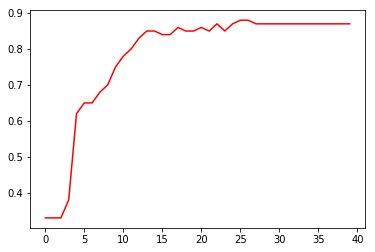

In [15]:
plt.plot(epochs, accs, c='red')
plt.show()

In [16]:
evals = model.evaluate(x_test,y_test)

50/50 [==============================] - 0s 731us/step


In [17]:
print('Loss', evals[0], 'Accuracy', evals[1])

Loss 0.5192908501625061 Accuracy 0.8599999904632568


In [18]:
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, mode='auto')

In [19]:
history1 = model.fit(x_train, y_train, batch_size=8, epochs=40, validation_split=0.3, callbacks=[early])

Train on 70 samples, validate on 30 samples
Epoch 1/40
70/70 [==============================] - 0s 195us/step - loss: 0.4336 - acc: 0.8571 - val_loss: 0.4872 - val_acc: 0.9000
Epoch 2/40
70/70 [==============================] - 0s 250us/step - loss: 0.4289 - acc: 0.8571 - val_loss: 0.4826 - val_acc: 0.9000
Epoch 3/40
70/70 [==============================] - 0s 493us/step - loss: 0.4243 - acc: 0.8571 - val_loss: 0.4794 - val_acc: 0.9000
Epoch 4/40
70/70 [==============================] - 0s 300us/step - loss: 0.4196 - acc: 0.8714 - val_loss: 0.4757 - val_acc: 0.9000
Epoch 5/40
70/70 [==============================] - 0s 282us/step - loss: 0.4162 - acc: 0.8857 - val_loss: 0.4730 - val_acc: 0.9000
Epoch 6/40
70/70 [==============================] - 0s 286us/step - loss: 0.4112 - acc: 0.8714 - val_loss: 0.4688 - val_acc: 0.9000
Epoch 7/40
70/70 [==============================] - 0s 352us/step - loss: 0.4071 - acc: 0.8714 - val_loss: 0.4649 - val_acc: 0.9000
Epoch 8/40
70/70 [==============

In [20]:
[loss, acc] = model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 127us/step


In [21]:
print(f'Loss: {loss}')
print(f'Acc: {acc}')

Loss: 0.4067875623703003
Acc: 0.8799999904632568
